<h1><center>
    ECE 438 - Laboratory 7<br/>
    Discrete-Time Random Process (Week 2)<br/>
    <small>Last updated on March 22, 2022</small><br/>
    <br/>
    Date:3/30/2023<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 Ruixiang Wang| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding of correlation coefficient for 2 random variables (30 pts)**: *Derivation, numerical estimates, scatter plots, questions*||||
|**Understanding of autocorrelation for filtered random processes (35 pts)**: *Derivation, scatter plots, autocorrelation plots, Python code, questions*||||
|**Understanding of correlation of two random processes (35 pts)**: *Cross-correlation plot, Python code, signal plots, auto and cross correlation plots of signals, questions*||||

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 1.2: Samples of Two Random Variables</left></h3>

**1. Use equation (8) to analytically calculate the correlation coefficient $\rho_{XZ}$ between $X$ and $Z$. Show all of your work. Remember that independence between $X$ and $Y$ implies that $\mathbb{E}[XY]=\mathbb{E}[X]\mathbb{E}[Y]$. Also remember that $X$ and $Y$ are zero-mean and unit variance.**

insert your answer here

**2. Write code to generate $1000$ i.i.d. samples of $X$, denoted as $X_1,X_2,\dots,X_{1000}$, and $1000$ i.i.d. samples of $Y$, denoted as $Y_1,Y_2,\dots,Y_{1000}$.**

In [6]:
X = np.random.normal(loc = 0, scale = 1, size = 1000)
Y = np.random.normal(loc = 0, scale = 1, size = 1000)


**3. Create samples of $Z$ using your generated samples of $X$ and $Z$. Since there are 4 different $Z$'s, we name the variables as ```Z1```, ```Z2```, ```Z3```, ```Z4```.**

In [7]:
Z1 = Y
Z2 = (X+Y)/2
Z3 = (4*X+Y)/5
Z4 = (99*X+Y)/100

**4. Generate a scatter plot of the ordered pair of samples $(X_i,Z_i)$ for each of 4 $Z$'s. Do this by plotting points $(X_1,Z_1),(X_2,Z_2),\dots,(X_{1000},Z_{1000})$. In order to plot points without connecting them with lines, use the ```plt.plot(X, Z, '.')``` command.**

(a) $Z=Y$

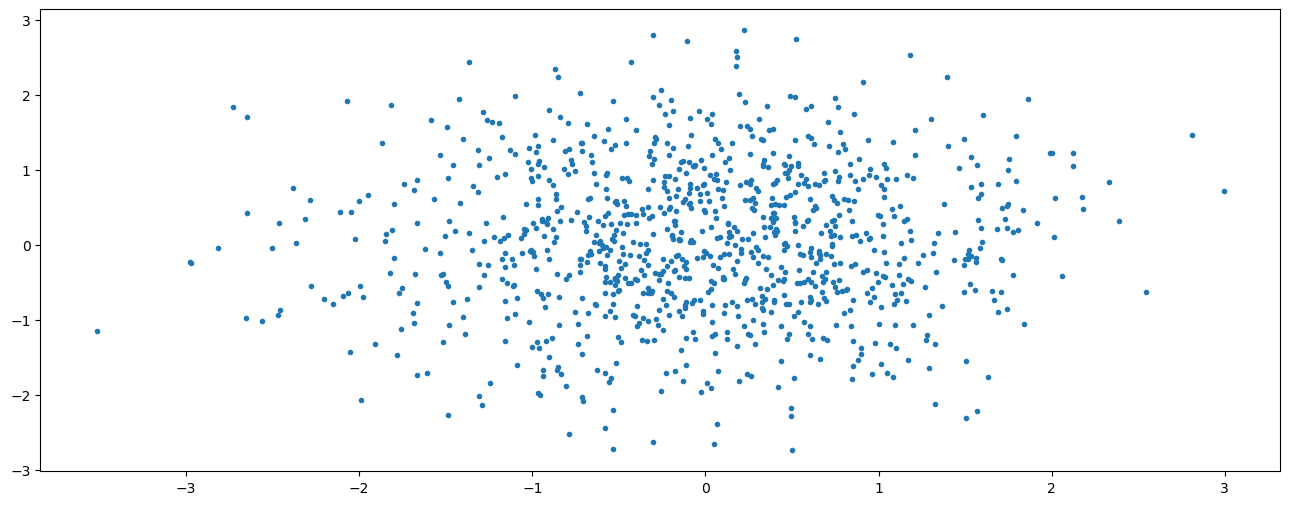

In [8]:
plt.plot(X, Z1, '.')


(b) $Z=\frac{X+Y}{2}$

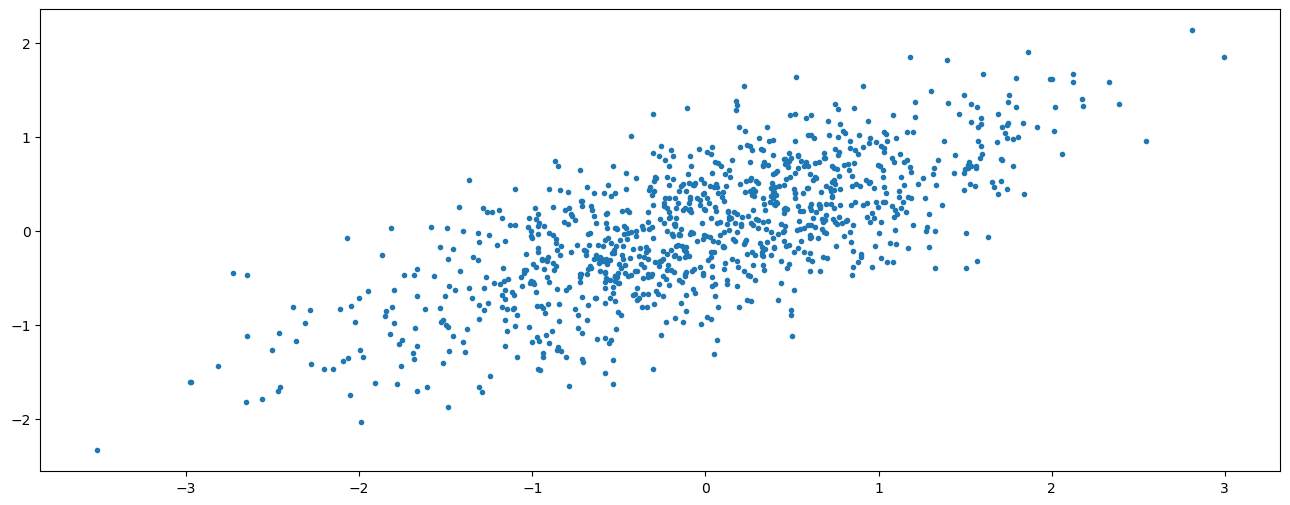

In [9]:
plt.plot(X, Z2, '.')


(c) $Z=\frac{4X+Y}{5}$

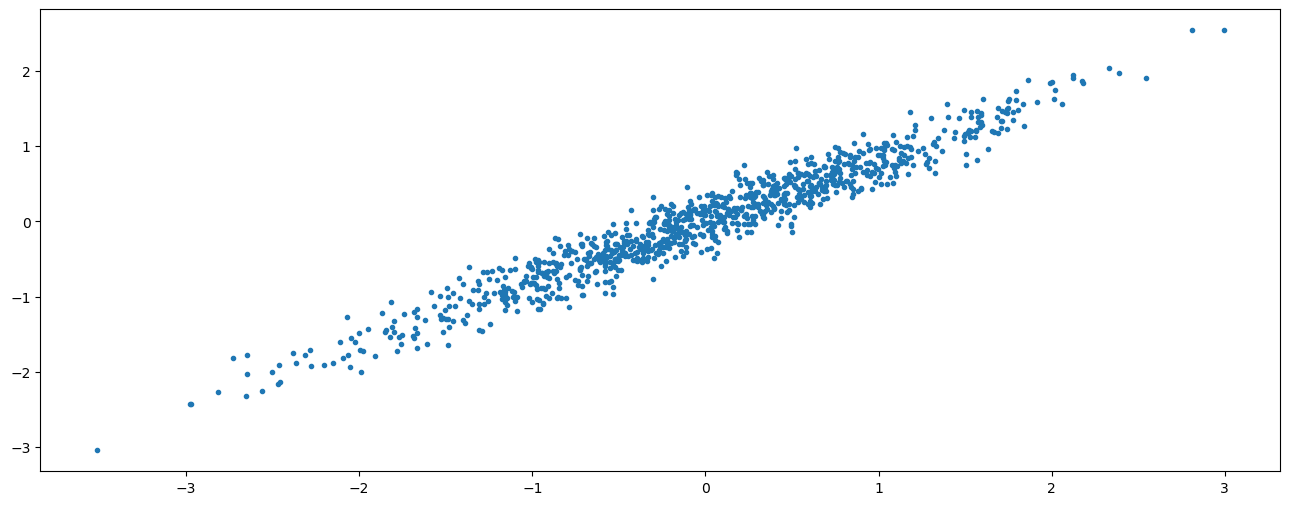

In [10]:
plt.plot(X, Z3, '.')


(d) $Z=\frac{99X+Y}{100}$

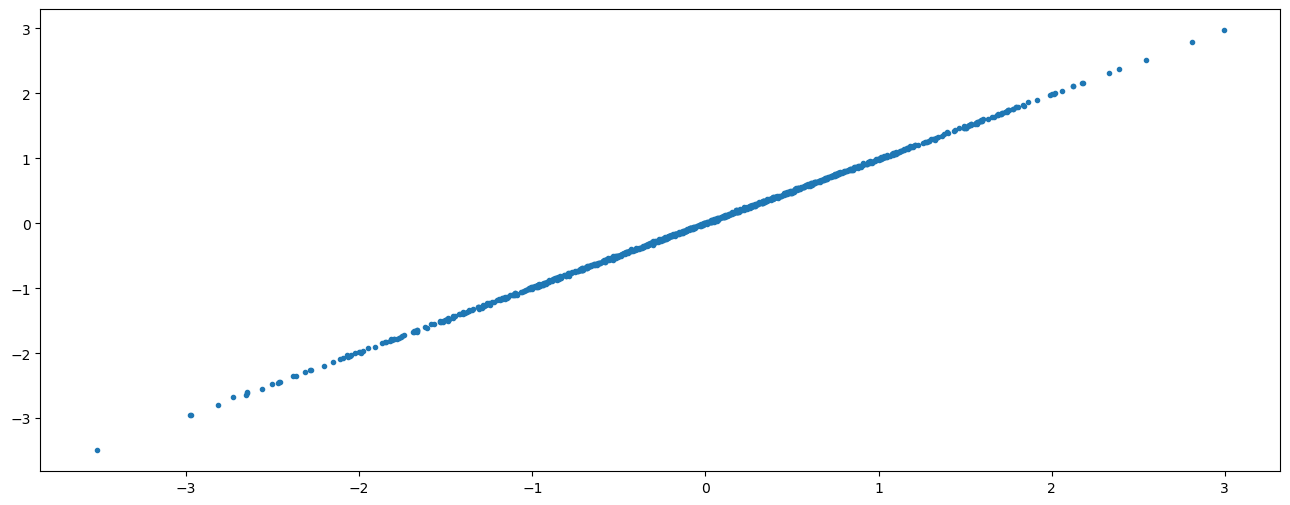

In [11]:
plt.plot(X, Z4, '.')


**5. Complete the function below that empirically computes an estimate of the correlation coefficient using your samples $X_i$ and $Z_i$ and the following formula.**

\begin{equation}
    \hat{\rho}_{XZ}=\frac{\sum_{i=1}^N(X_i-\hat{\mu}_X)(Z_i-\hat{\mu}_Z)}{\sqrt{\sum_{i=1}^N(X_i-\hat{\mu}_X)^2\sum_{i=1}^N(Z_i-\hat{\mu}_Z)^2}}
\end{equation}

**Hint:** You will need to make use of the function ```get_sample_mean(X)``` that you wrote in Lab07a.

In [12]:
def get_sample_mean(X):
    """
    Parameters
    ---
    X: the samples of the random variable
    
    Returns
    ---
    mean_X: the sample mean of the random variable
    """
    mean_X = 0
    for i in range(len(X)):
        mean_X += X[i]
        
    mean_X /= len(X)
    return mean_X

In [13]:
def empirical_corr_coef(X, Z):
    """
    Parameters
    ---
    X: random samples
    Z: random samples
    
    Returns
    ---
    rho: the correlation coefficient
    """
    rho = np.sum((X-get_sample_mean(X))*(Z-get_sample_mean(Z))) / np.sqrt(np.sum((X-get_sample_mean(X))**2)*np.sum((Z-get_sample_mean(Z))**2))
   
    return rho

**6. Print the empirical correlation coefficient between $X$ and $Z$ for each of the four cases.**

(a) $Z=Y$

In [14]:
CC1 = empirical_corr_coef(X,Z1)
print(CC1)

0.03686753842727948


(b) $Z=\frac{X+Y}{2}$

In [15]:
CC2 = empirical_corr_coef(X,Z2)
print(CC2)


0.7111134212156706


(c) $Z=\frac{4X+Y}{5}$

In [16]:
CC3 = empirical_corr_coef(X,Z3)
print(CC3)


0.9691940730833556


(d) $Z=\frac{99X+Y}{100}$

In [17]:
CC4 = empirical_corr_coef(X,Z4)
print(CC4)


0.999946329499096


**7. Why are $\rho_{XZ}$ and $\hat{\rho}_{XZ}$ not exactly equal?**

Summation is not ideally an integral.

**8. Explain how the scatter plots are related to $\rho_{XZ}$.**

The stronger correlation coefficient, the more consistent between two r.v.

<h3 style="color:red;"><left>Exercise 2.2</left></h3>

**1. Calculate the theoretical autocorrelation of $Y_n$, $r_{YY}[m]$, using (10) and (11). Show all of your work.**

rxx[m] = delta[m] </br>
h[m] = delta[m] - delta[m-1] + delta[m-2]</br>
ryy = np.convolve(h[m],h[-m],rxx[m])

<img src="Image_20230330133526.jpg">

**2. Write code to generate $1000$ independent samples of a Gaussian random variable $X$ with mean $0$ and variance $1$. Filter the samples using (12). We will denote the filtered signal $Y_i$, $i=1,2,\dots,1000$.**

In [18]:
X = np.random.normal(loc = 0, scale = 1, size = 1000)
Y = np.zeros(len(X))
Y[0] = X[0]
Y[1] = X[1] - X[0]
for i in range(2,len(X)):
    Y[i] = X[i]-X[i-1]+X[i-2]

**3. Plot the following 4 scatter plots. Include the corresponding theoretical correlation, using $r_{YY}[m]$, in the title.**

(a) $(Y_i,Y_{i+1})$ for $i=1,2,\dots,990$

Text(0.5, 1.0, '-2')

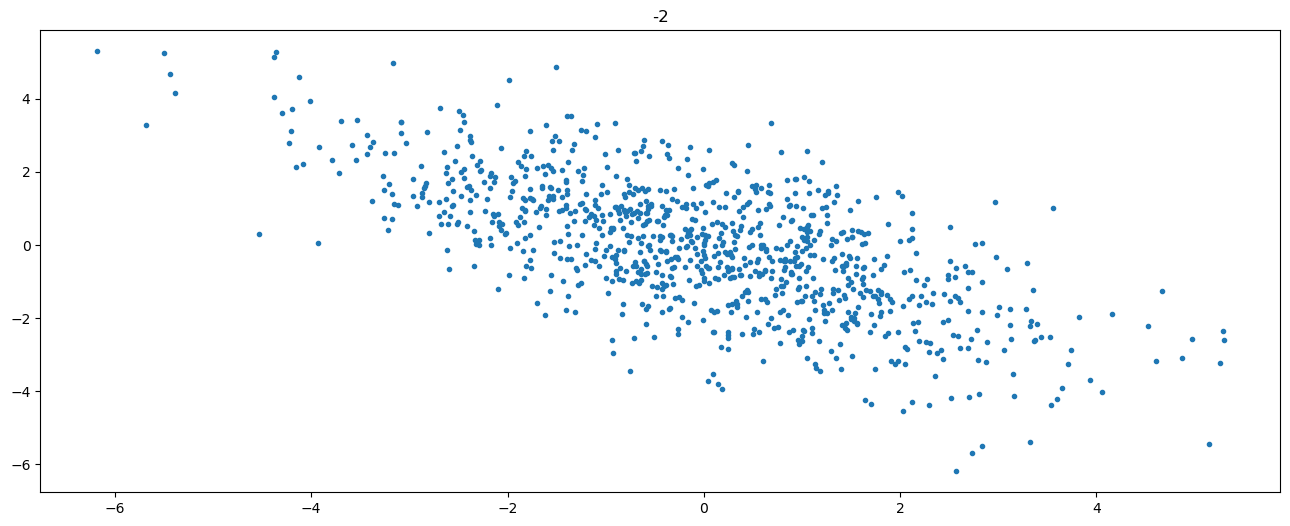

In [19]:
Y0 = np.zeros(990)
Y1 = np.zeros(990)
for i in range(1,990):
    Y0[i] = Y[i]

for i in range(1,990):
    Y1[i] = Y[i+1]
m = 1
rYY1 = -2
    
plt.plot(Y0,Y1,'.')
plt.title(rYY1)

(b) $(Y_i,Y_{i+2})$ for $i=1,2,\dots,990$

Text(0.5, 1.0, '1')

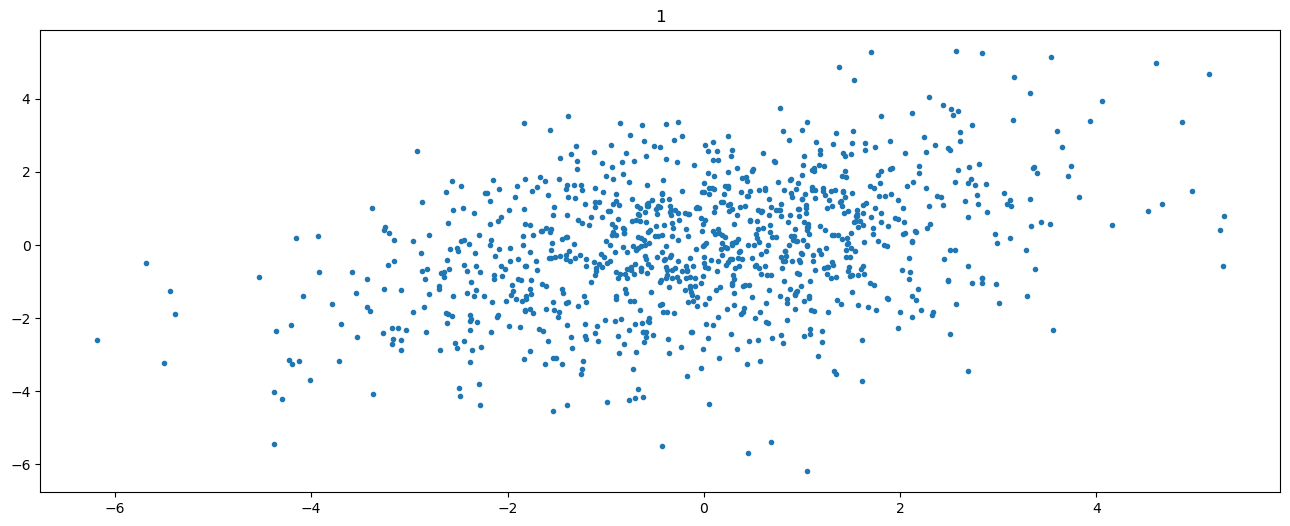

In [20]:
Y2 = np.zeros(990)

for i in range(1,990):
    Y2[i] = Y[i+2]

m = 2
rYY2 = 1
    
plt.plot(Y0,Y2,'.')
plt.title(rYY2)


(c) $(Y_i,Y_{i+3})$ for $i=1,2,\dots,990$

Text(0.5, 1.0, '0')

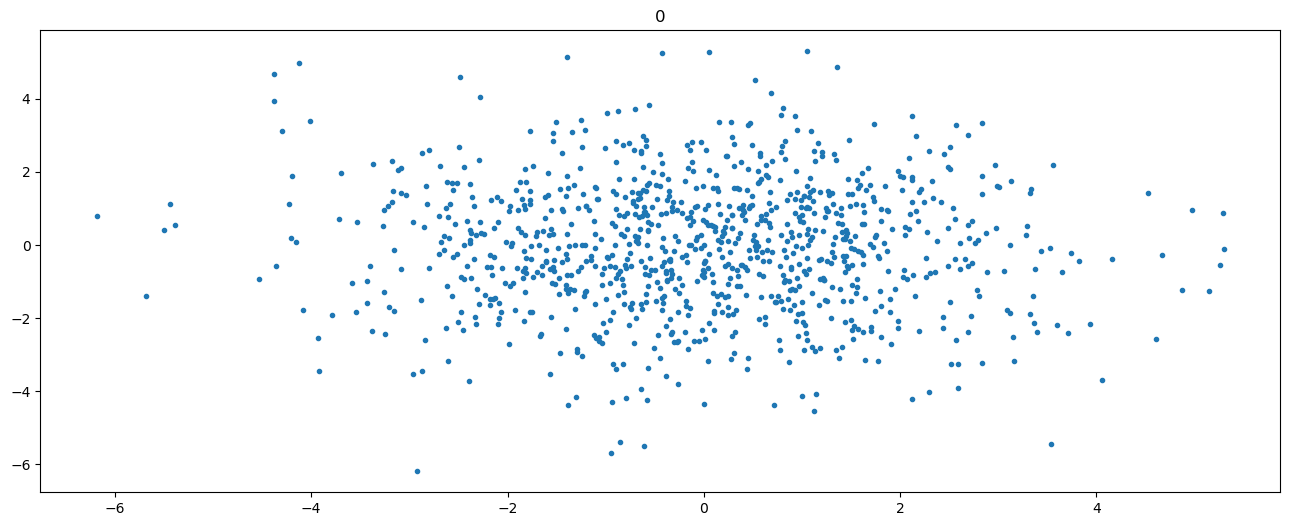

In [21]:
Y3 = np.zeros(990)

for i in range(1,990):
    Y3[i] = Y[i+3]

rYY3 = 0
    
plt.plot(Y0,Y3,'.')
plt.title(rYY3)



(d) $(Y_i,Y_{i+4})$ for $i=1,2,\dots,990$

Text(0.5, 1.0, '0')

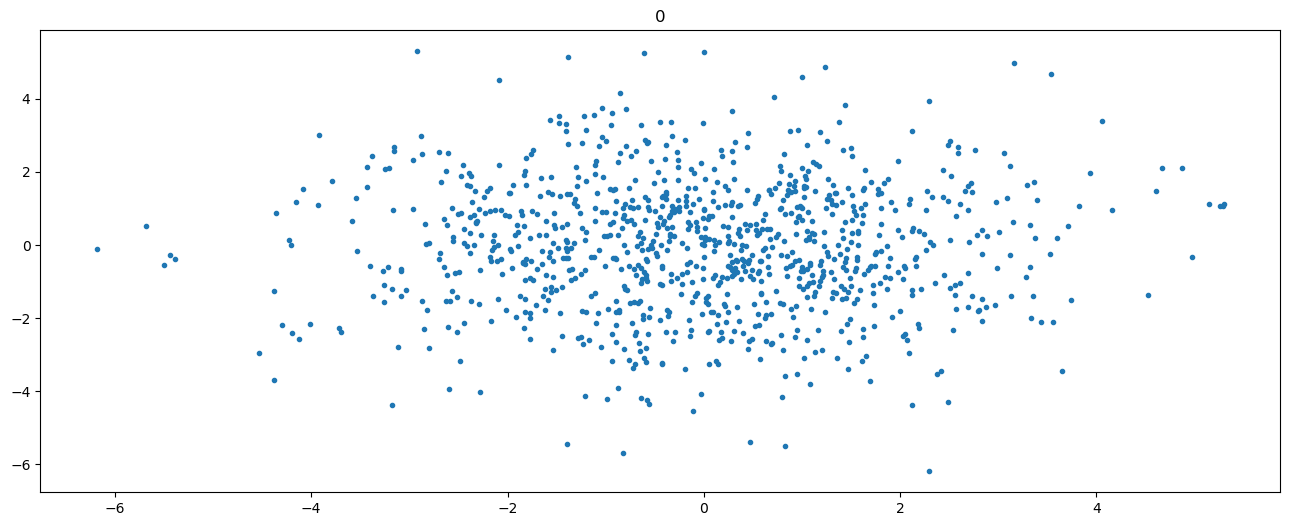

In [22]:
Y4 = np.zeros(990)

for i in range(1,990):
    Y4[i] = Y[i+4]

rYY4 = 0
    
plt.plot(Y0,Y4,'.')
plt.title(rYY4)



**4. What can you conclude about the output random process from these plots?**

Autocorrelation is stronger when two sample points are not too far apart

**5. Complete the function below to calculate the sample autocorrelation of $Y_n$ using (13).**

In [34]:
def get_sample_autocorr(X, ms):
    """
    Parameters
    ---
    X: the random process
    ms: the vector of lag values
    
    Returns
    ---
    r: the sample autocorrelation
    """
    r = np.zeros(len(ms))
    for i,j in enumerate(ms):
        r[i] = np.sum(X[:(len(X) - np.abs(j).astype(int))]*X[np.abs(j).astype(int):len(X)])/(len(X)-np.abs(j))
    return r

**6. Make the following two plots.**

(a) $r_{YY}$ vs $m$ for $-20\leq m\leq20$

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1. -2.  3. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]


<StemContainer object of 3 artists>

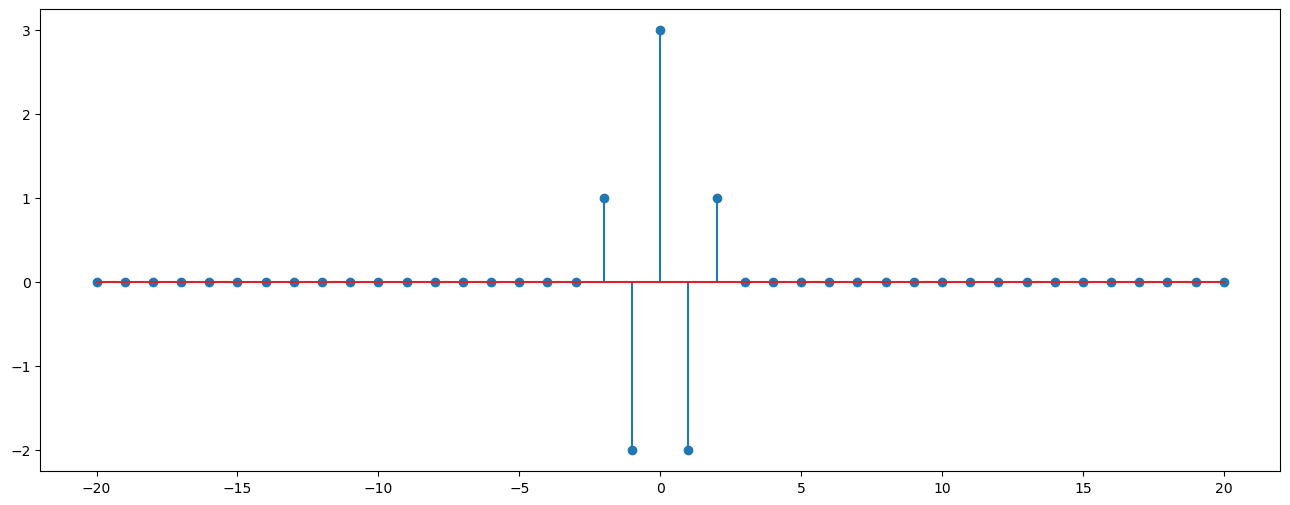

In [35]:
m = np.linspace(-20,20,41)
rYY = np.zeros(41)
for ctr in range(41):
    rYY[ctr] = 3*(m[ctr] == 0).astype(float) - 2*(m[ctr] == -1).astype(float) - 2*(m[ctr] == 1).astype(float) + (m[ctr] == 2).astype(float) + (m[ctr] == -2).astype(float)
print(rYY)
plt.stem(m,rYY)

(b) $r'_{YY}$ vs $m$ for $-20\leq m\leq20$

<StemContainer object of 3 artists>

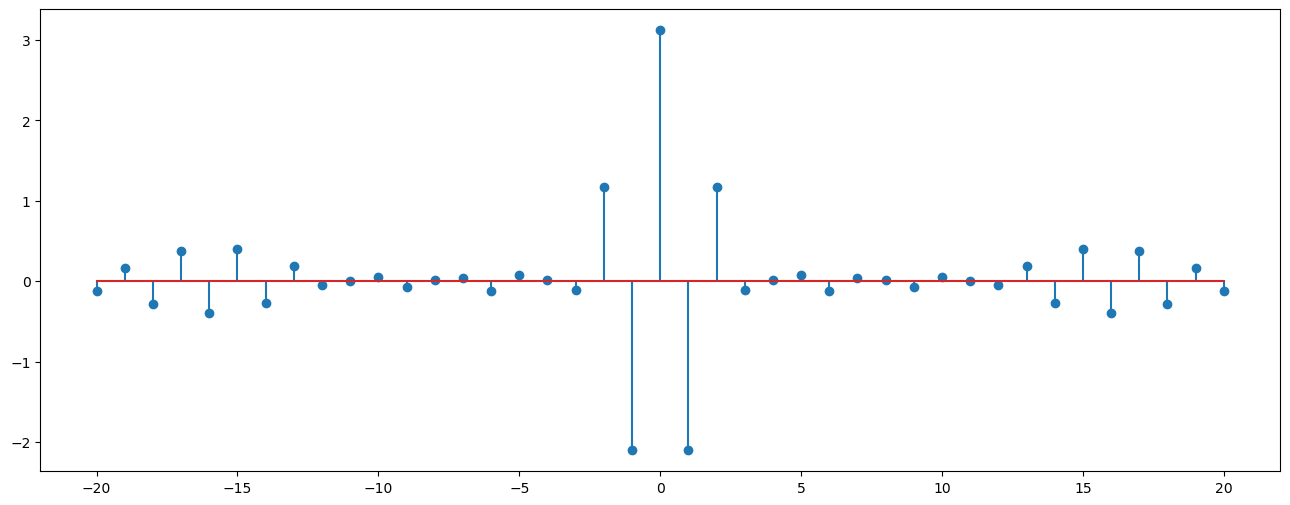

In [37]:
rYY_est = get_sample_autocorr(Y,m)
plt.stem(m,rYY_est)

**7. Does equation (13) produce a reasonable approximation of the true autocorrelation?**

Generally yes. The ripple at further sample point is not.

**8. For what value of $m$ does $r_{YY}[m]$ reach its maximum?**

When m is 0

**9. For what value of $m$ does $r'_{YY}[m]$ reach its maximum?**

When m is 0

<h3 style="color:red;"><left>Exercise 3.2</left></h3>

**1. Using (15) and (16), complete the function below to compute the sample cross-correlation between two discrete-time random processes, $X$ and $Y$.**

In [50]:
def get_sample_crosscorr(X, Y, ms):
    """
    Parameters
    ---
    X: the first random process
    Y: the second random process
    ms: the vector of the lag values
    
    Returns
    ---
    c: the sample cross-correlation
    """
    c = np.zeros(len(ms))
    for i,j in enumerate(ms):
        if j < 0:
            c[i] = np.sum(X[np.abs(j).astype(int):len(X)]*Y[np.abs(j).astype(int) + (j).astype(int) :len(X) + (j).astype(int)])/(len(X)-np.abs(j))
        else:
            c[i] = np.sum(X[:(len(X) - (j).astype(int))]*Y[(j).astype(int):len(X)])/(len(X)-j)
    return c

**2. Generate two length $1000$ sequences of zero-mean Gaussian random variables, denoted as $X_n$ and $Z_n$. Then generate a new sequence $Y_n=X_n+Z_n$.**

In [51]:
Xn = np.random.normal(loc = 0, scale = 1, size = 1000)
Zn = np.random.normal(loc = 0, scale = 1, size = 1000)
Yn = Xn + Zn

**3. Use the function ```get_sample_crosscorr(X, Y, ms)``` to calculate the sample cross-correlation between $X$ and $Y$ for lags $-10\leq m\leq10$. Plot the cross-correlation function.**

<StemContainer object of 3 artists>

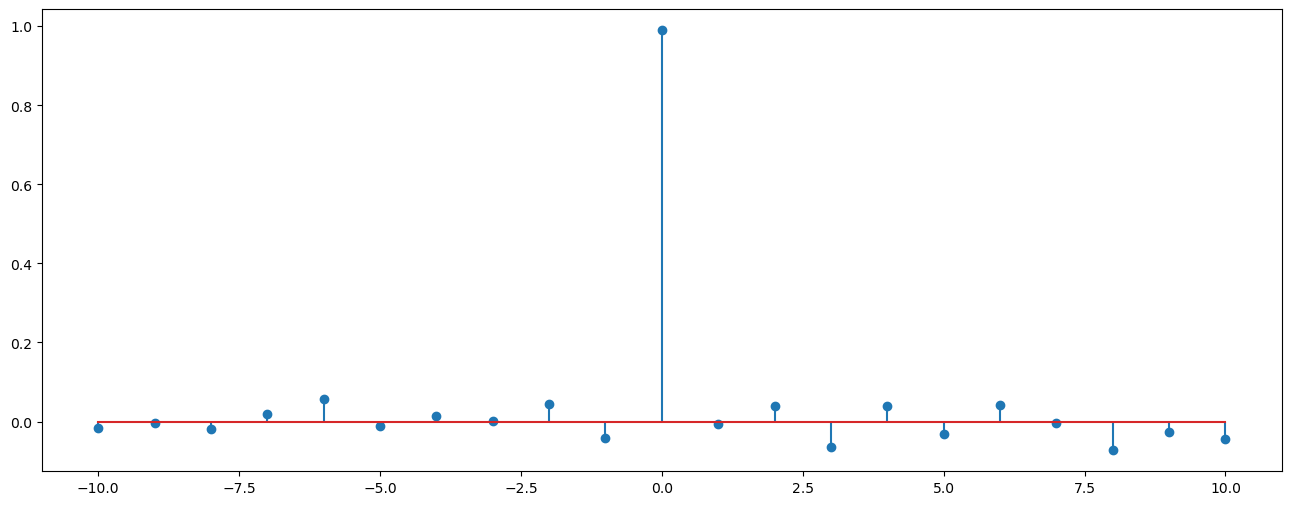

In [52]:
ms = np.linspace(-10,10,21)
cXY = get_sample_crosscorr(Xn,Yn,ms)

plt.stem(ms,cXY)

**4. Which value of $m$ produces the largest cross-correlation? Why?**

When m is 0

**5. Is the cross-correlation function an even function of $m$? Why or why not?**

It appears not even, because the cross correlation is not even

<h3 style="color:red;"><left>Exercise 3.3</left></h3>

In [42]:
trans = np.load("trans.npy")
received = np.load("received.npy")
print(f"Length of trans: {len(trans)}")
print(f"Length of received: {len(received)}")

# convert them to numpy arrays
trans, received = np.array(trans), np.array(received)

Length of trans: 1000
Length of received: 1000


**1. Plot the transmitted signal and the received signal.**

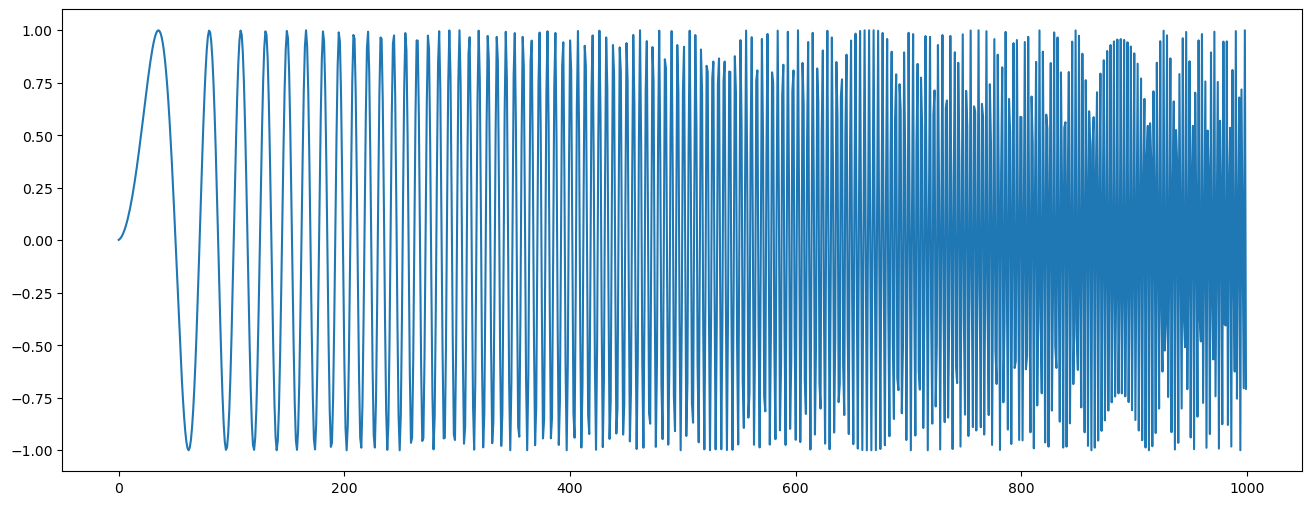

In [45]:
plt.plot(trans)

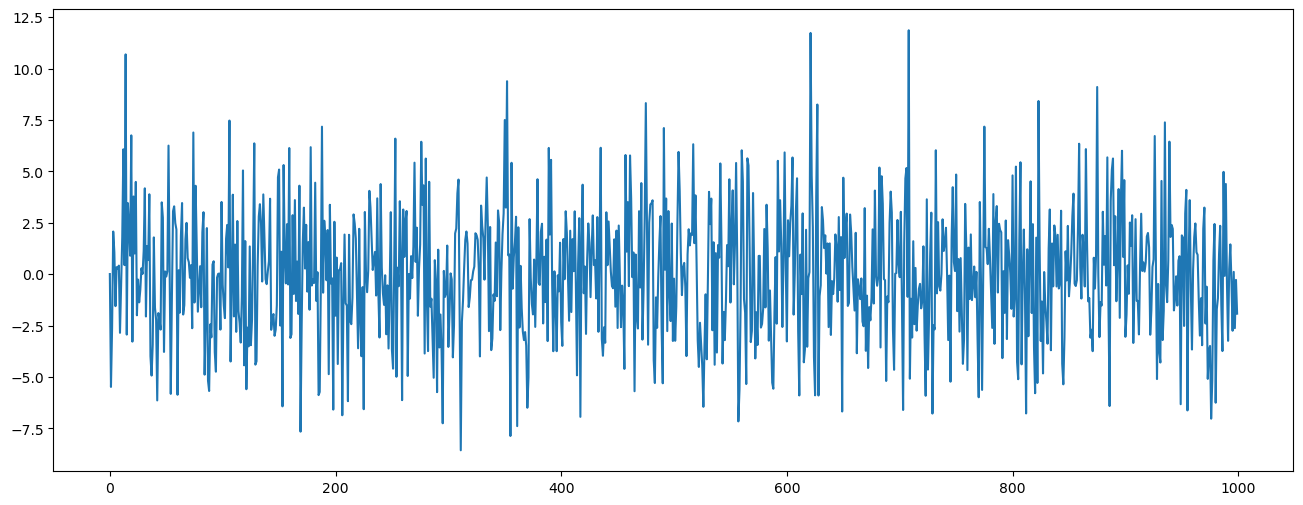

In [46]:
plt.plot(received)

**2. Can you estimate the delay $D$ by a visual inspection of the received signal?**

No, the received signal looks random

**3. Compute the autocorrelation of the signal ```trans``` for the lags $-100\leq m\leq 100$, and plot it.**

<StemContainer object of 3 artists>

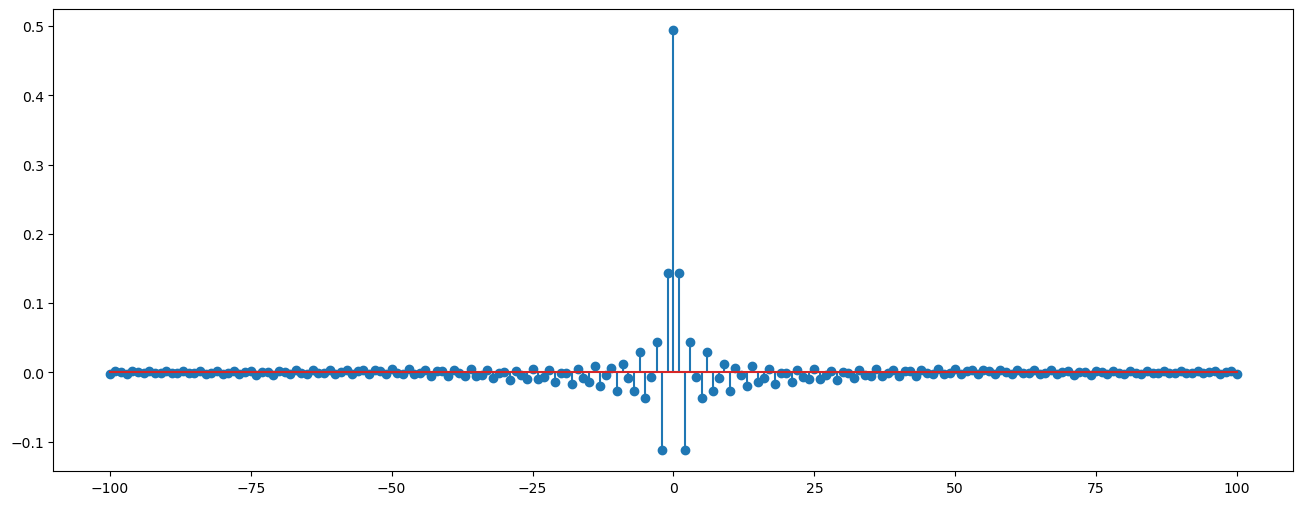

In [53]:
m = np.linspace(-100,100,201)
rXX = get_sample_autocorr(trans,m)

plt.stem(m,rXX)

**4. Compute the sample cross-correlation between the signal ```trans``` and ```received``` for the range of lag values $-100\leq m\leq100$.**

<StemContainer object of 3 artists>

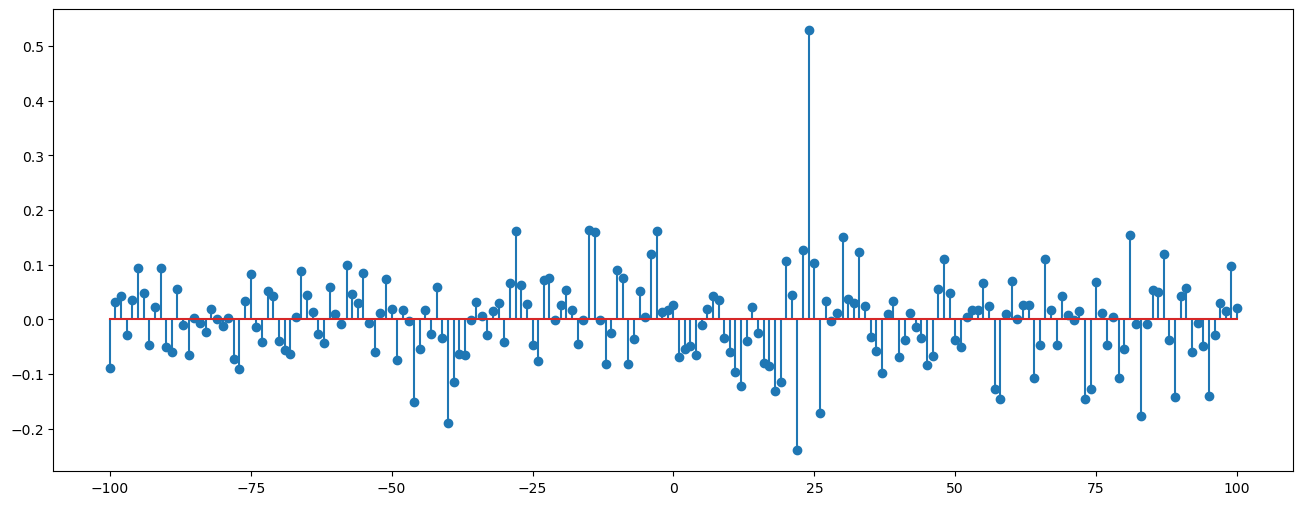

In [54]:
m = np.linspace(-100,100,201)
cXY = get_sample_crosscorr(trans,received, m)

plt.stem(m,cXY)


**5. Determine the delay $D$ from the sample correlation. How did you determine this?**

D is 24. There is a peak at 24.
